In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

test.csv
train.csv



In [2]:
train = pd.read_csv('../input/train.csv')
submission = pd.read_csv('../input/test.csv')

In [3]:
y_train = train['label']
X_train = train.drop('label', axis=1)
X_submission = submission

In [4]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [5]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_submission.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

print(pca.explained_variance_ratio_)

[ 0.09748938  0.07160266]


In [8]:
print(X_train.shape)
print(pca_result.shape)

(42000, 784)
(42000, 2)


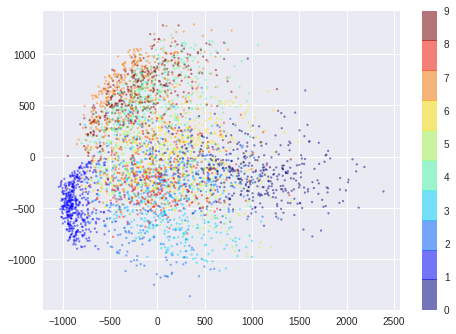

In [9]:
plt.scatter(pca_result[:4000, 0], pca_result[:4000, 1], c=y_train[:4000], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 10), s=5)
plt.colorbar()

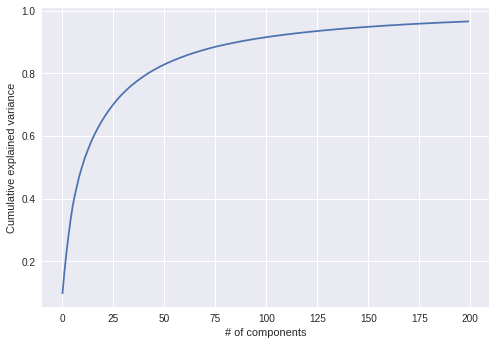

In [10]:
pca = PCA(200)
pca_full = pca.fit(X_train)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')

In [11]:
pca = PCA(n_components=50)
X_train_transformed = pca.fit_transform(X_train)
X_submission_transformed = pca.transform(X_submission)

In [12]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split( 
    X_train_transformed, y_train, test_size=0.2, random_state=13)


In [13]:
components = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
neighbors = [1, 2, 3, 4, 5, 6, 7]

scores = np.zeros( (components[len(components)-1]+1, neighbors[len(neighbors)-1]+1 ) )

In [14]:
from sklearn.neighbors import KNeighborsClassifier

for component in components:
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_pca[:,:component], y_train_pca)
        score = knn.score(X_test_pca[:,:component], y_test_pca)
        #predict = knn.predict(X_test_pca[:,:component])
        scores[component][n] = score
        
        print('Components = ', component, ', neighbors = ', n,', Score = ', score)   

Components =  5 , neighbors =  1 , Score =  0.683452380952
Components =  5 , neighbors =  2 , Score =  0.670952380952
Components =  5 , neighbors =  3 , Score =  0.71130952381
Components =  5 , neighbors =  4 , Score =  0.723333333333
Components =  5 , neighbors =  5 , Score =  0.730119047619
Components =  5 , neighbors =  6 , Score =  0.735357142857
Components =  5 , neighbors =  7 , Score =  0.739404761905
Components =  10 , neighbors =  1 , Score =  0.910476190476
Components =  10 , neighbors =  2 , Score =  0.905952380952
Components =  10 , neighbors =  3 , Score =  0.92
Components =  10 , neighbors =  4 , Score =  0.92130952381
Components =  10 , neighbors =  5 , Score =  0.922619047619
Components =  10 , neighbors =  6 , Score =  0.922023809524
Components =  10 , neighbors =  7 , Score =  0.920595238095
Components =  15 , neighbors =  1 , Score =  0.94619047619
Components =  15 , neighbors =  2 , Score =  0.942380952381
Components =  15 , neighbors =  3 , Score =  0.953452380952


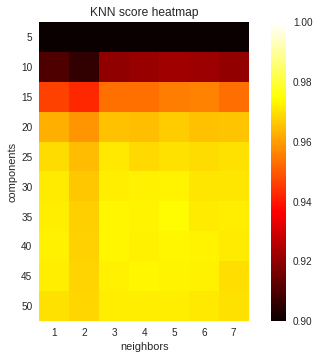

In [15]:
scores = np.reshape(scores[scores != 0], (len(components), len(neighbors)))

x = [0, 1, 2, 3, 4, 5, 6]
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.rcParams["axes.grid"] = False

fig, ax = plt.subplots()
plt.imshow(scores, cmap='hot', interpolation='none', vmin=.90, vmax=1)
plt.xlabel('neighbors')
plt.ylabel('components')
plt.xticks(x, neighbors)
plt.yticks(y, components)
plt.title('KNN score heatmap')

plt.colorbar()
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca[:, :35], y_train_pca)

predict_labels = knn.predict(X_submission_transformed[:, :35])

In [17]:
predict_labels

array([2, 0, 9, ..., 3, 9, 2])

In [18]:
Submission = pd.DataFrame({
        "ImageId": range(1, predict_labels.shape[0]+1),
        "Label": predict_labels
    })

Submission.to_csv("KnnMnistSubmission.csv", index=False)

Submission.head(5)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [19]:
Submission.shape

(28000, 2)